# Библиотеки NumPy, Matpotlib, pandas

В этой лекции мы вкратце познакомимся с тремя основными библиотеками для решения научных задач. Они не являются частью стандартной библиотеки, и в общем случае должны устанавливаться вручную. Однако поскольку мы использовали дистрибутив Anaconda для установки Python, нам не потребуется ничего делать дополнительно, так как он включает в себя все нужное.

## Содержание лекции

* [NumPy](#NumPy)
  * [Создание массива](#Создание-массива)
  * [Получение среза](#Получение-среза)
  * [Изменение формы](#Изменение-формы)
  * [Операции и универсальные функции](#Операции-и-универсальные-функции)
* [Matplotlib](#Matplotlib)
  * [График](#График)
  * [Диаграмма разброса](#Диаграмма-разброса)
  * [Гистограмма](#Гистограмма)
* [pandas](#pandas)
  * [Класс Series](#Класс-Series)
  * [Класс DataFrame](#Класс-DataFrame)
  * [Статистика](#Статистика)

## NumPy

Библиотека [NumPy](https://docs.scipy.org/doc/numpy/reference/) предоставляет типы и функции для вычислений с многомерными **массивами**. Массивом (англ. *array*) в программировании называется контейнер, хранящий последовательно друг за другом множество элементов. Из тех контейнеров, с которыми мы познакомились с вами в одной из предыдущих лекций, он больше всего похож на [список](09_Collections.ipynb#Список). Основное же отличие заключается в том, что массив может хранить только значения фиксированного типа - того, который был указан при его создании. Благодаря этому ограничению можно эффективнее организовать хранение в памяти элементов массива, и добиться хорошей производительности операций, выполняющихся над всеми элементами.

Элементами многомерного массива являются другие массивы. Классический пример - матрица, представляющая собой массив строк, каждая из которых является массивом чисел.

Основным типом данных, предоставляемым библиотекой NumPy, является класс `ndarray`, который описывает многомерный массив. Перечислим наиболее важные атрибуты экземпляров этого класса:

1. `ndim` - количество измерений или, как их принято называть, осей. Например, обычная матрица имеет две оси (строки и столбцы). Оси идентифицируются своим порядковым номером, причем как и для индексов последовательностей, нумерация начинается с нуля (у матрицы строки - это нулевая ось, а столбцы - первая).
2. `shape` - форма массива. Это кортеж, который для каждой оси содержит число элементов в ней. Например, если у нас есть матрица размерности $N \times M$, то `shape` будет равно `(N, M)`.
3. `size` - общее количество элементов в многомерном массиве. По сути, представляет собой произведение всех элементов `shape`.
4. `dtype` - объект, содержащий информацию о типе данных элементов массива.

В дальнейших примерах нам часто будет требоваться выводить информацию о массиве на экран, поэтому мы определим простую функцию для этого:

In [1]:
import numpy as np

def print_array(a):
    print('ndim={}, shape={}, size={}, dtype={}'.format(a.ndim, a.shape, a.size, a.dtype))
    print(a)

### Создание массива

Существует несколько способов создать массив. Один из них - использовать функцию `array`.

In [2]:
# создаем одномерный массив
a = np.array([1, 2, 3])
print_array(a)

ndim=1, shape=(3,), size=3, dtype=int32
[1 2 3]


In [3]:
# создаем двумерный массив (матрицу)
a = np.array([[0.1, 0.2, 0.3, 0.4],
              [0.5, 0.6, 0.7, 0.8]])
print_array(a)

ndim=2, shape=(2, 4), size=8, dtype=float64
[[0.1 0.2 0.3 0.4]
 [0.5 0.6 0.7 0.8]]


Если при создании массива не указывается тип его элементов, то функция `array` в качестве него выбирает такой, чтобы можно было хранить любой элемент из перечисленных в ее вызове:

In [4]:
a = np.array([1, 2, 3])
print_array(a)

ndim=1, shape=(3,), size=3, dtype=int32
[1 2 3]


In [5]:
a = np.array([1, 2, 3.1])
print_array(a)

ndim=1, shape=(3,), size=3, dtype=float64
[1.  2.  3.1]


In [6]:
# явно указываем тип элементов
a = np.array([1, 2, 3], dtype=complex)
print_array(a)

ndim=1, shape=(3,), size=3, dtype=complex128
[1.+0.j 2.+0.j 3.+0.j]


Библиотека NumPy для элементов массива использует собственные типы данных, которые можно использовать так же, как соответствующие встроенные. Особенность типов данных из NumPy в том, что для них четко определено количество бит, которое они занимают в памяти. Можно при создании массива указать и тип данных из библиотеки NumPy:

In [7]:
# используем 16битовые целые числа для хранения элементов
a = np.array([1, 2, 3], dtype=np.int16)
print_array(a)

ndim=1, shape=(3,), size=3, dtype=int16
[1 2 3]


Важно при этом понимать, какой диапазон значений можно хранить в том или ином типе (например, для int16 это $[-32768, 32767]$), потому что если впоследствии ваша программа присвоит элементу массива значение вне этого диапазона, оно будет сохранено неправильно!

Часто бывает так, что при создании массива известная его форма, но не значения элементов. В этом случае можно воспользоваться функциями `zeros`, `ones` или `empty`, которые заполняют созданный массив нулями, единицами или случайными значениями. В качестве первого аргумента все эти функции принимают кортеж, описывающий форму массива:

In [8]:
# создаем массив с 3мя осями;
# он представляет собой массив из двух массивов, каждый из
# которых содержит 3 массива, каждый из которых содержит 4 элемента
a = np.zeros((2, 3, 4))
print_array(a)

ndim=3, shape=(2, 3, 4), size=24, dtype=float64
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


Обратите внимание, что по умолчанию для элементов массива используется тип `float64`. С помощью именованного параметра `dtype` функции `zeros` и других можно указать желаемый тип элементов.

Наконец, библиотека NumPy предоставляет функцию `arange` для генерации числовой последовательности, аналогичную встроенной функции `range`. Отличие заключается в том, что с помощью `arange` можно генерировать и последовательности чисел с плавающей точкой.

In [9]:
# целые из интервала [0, 10) с шагом 1
a = np.arange(10)
print_array(a)

ndim=1, shape=(10,), size=10, dtype=int32
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# действительные из интервала [0.0, 1.0) c шагом 0.1
a = np.arange(0, 1, 0.1)
print_array(a)

ndim=1, shape=(10,), size=10, dtype=float64
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


Заметим, что использовать функцию `arange` для получения действительных чисел, стоит осторожно, потому что размер полученного массива может отличаться от ожидаемого (это связано с неточным представлением [чисел с плавающей точкой](04_Data_Types.ipynb#Типы-с-плавающей-точкой)). Более безопасной с этой точки зрения является функция `linspace`, которая возвращает указанное количество равноудаленных друг от друга чисел из интервала:

In [11]:
# 10 равноудаленных друг от друга чисел из интервала [0, 0.9]
a = np.linspace(0, 0.9, 10)
print_array(a)

ndim=1, shape=(10,), size=10, dtype=float64
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


### Получение среза

В случае одномерных массивов, получение срезов выполняется так же, как и для обычных последовательностей (списков, кортежей и т.д.). У многомерных массивов индексироваться может каждая ось. Если при этом отсутствует индекс для некоторой оси, то возвращаются все ее элементы. Срез объекта типа `ndarray` также имеет тип `ndarray`.

In [12]:
a_multi = np.array([[0, 1, 2],
                    [3, 4, 5],
                    [6, 7, 8],
                    [9, 10, 11]])

# выводи третий элемент второй строки (помните, что нумерация
# индексов начинается с нуля!)
print(a_multi[1, 2]) 

5


In [13]:
# получаем срез, состоящий из второй и третьей строки
result = a_multi[1:3]
print(type(result))
print(result)

<class 'numpy.ndarray'>
[[3 4 5]
 [6 7 8]]


In [14]:
# получаем срез, состоящий из первого и третьего элемента
# второй и четвертой строки, взятых в обратном порядке
print(a_multi[3:0:-2, 0:3:2])

[[ 9 11]
 [ 3  5]]


Тип `ndarray` является итерируемым, поэтому его можно использовать в цикле `for ... in`. Итерация при этом происходит по первой оси (например, в случае матриц - по строкам):

In [15]:
for row in a_multi:
    print(row)

[0 1 2]
[3 4 5]
[6 7 8]
[ 9 10 11]


Для итерации по элементам нужно использовать атрибут `flat`:

In [16]:
for item in a_multi.flat:
    print(item)

0
1
2
3
4
5
6
7
8
9
10
11


Обратите внимание, что при итерации по элементам вначале изменяется последняя ось, потом предпоследняя и т.д. Например, для трехмерного массива $N_1 \times N_2 \times N_3$ элементы извлекались бы в такой последовательности:

<pre>
a[0][0][0], ..., a[0][0][N3], a[0][1][0], ..., a[0][N2][N3], a[1][0][0], ..., a[N1][N2][N3]
</pre>

Поскольку `ndarray` относится к изменяемым типам данных, его элементы можно модифицировать:

In [17]:
a_multi[0, 0] = 100            # присваиваем первому элементу 100
a_multi[1] = 0                 # присваиваем всем элементам второй строки 0
a_multi[2] = np.arange(20, 23) # заменяем третью строку на строку [20, 21, 22]

print(a_multi)

[[100   1   2]
 [  0   0   0]
 [ 20  21  22]
 [  9  10  11]]


### Изменение формы

Класс `ndarray` предоставляет несколько методов и атрибутов, которые изменяют форму массива (количество и размер осей):

| <div align="left">Название</div> | Описание |
|----------------------------------|----------|
| <div align="left"><samp>reshape(shape, ...)</samp></div>                                                                      | Возвращает новый массив с теми же данными, но с формой <samp>shape</samp>                                                    |
| <div align="left"><samp>resize(shape, ...)</samp></div>                                                                       | Изменяет форму текущего массива на <samp>shape</samp>                                                                        |
| <div align="left"><samp>ravel(...)</samp></div>                                                                               | Возвращает "плоскую" версию массива с одним измерением                                                                       |

При заполнении нового массива, его первому элементу присваивается первый элемент старого, второму - второй и т.д. Причем порядок элементов соответствует тому, в котором они возвращались бы при итерации по всем элементам (по атрибуту `flat`).

Еще класс `ndarray` предоставляет метод `transpose` и атрибут `T`, которые позволяют получить транспонированную версию многомерного массива.

In [18]:
a1 = np.arange(10)
a2 = a1.reshape((2, 5))
a3 = a2.T
a4 = a3.ravel()

In [19]:
print_array(a1)

ndim=1, shape=(10,), size=10, dtype=int32
[0 1 2 3 4 5 6 7 8 9]


In [20]:
print_array(a2)

ndim=2, shape=(2, 5), size=10, dtype=int32
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [21]:
print_array(a3)

ndim=2, shape=(5, 2), size=10, dtype=int32
[[0 5]
 [1 6]
 [2 7]
 [3 8]
 [4 9]]


In [22]:
print_array(a4)

ndim=1, shape=(10,), size=10, dtype=int32
[0 5 1 6 2 7 3 8 4 9]


Для объединения нескольких многомерных массивов в один класс `ndarray` предоставляет следующие функции:

| <div align="left">Название</div> | Описание |
|----------------------------------|----------|
| <div align="left"><samp>hstack(arrays_seq)</samp></div>                                                                       | Возвращает новый массив, каждая строка которого является конкатенацией строк массивов из последовательности <samp>arrays_seq</samp>                                                                                                        |
| <div align="left"><samp>vstack(arrays_seq)</samp></div>                                                                       | Возвращает новый массив, каждый столбец которого является конкатенацией столбцов массивов из последовательности <samp>arrays_seq</samp>                                                                                                        |

In [23]:
a1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
a2 = np.array([[11, 12],
               [13, 14],
               [15, 16]])
a3 = np.array([[11, 12, 13],
               [14, 15, 16]])

In [24]:
print_array(np.hstack([a1, a2]))

ndim=2, shape=(3, 5), size=15, dtype=int32
[[ 1  2  3 11 12]
 [ 4  5  6 13 14]
 [ 7  8  9 15 16]]


In [25]:
print_array(np.vstack((a1, a3)))

ndim=2, shape=(5, 3), size=15, dtype=int32
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [11 12 13]
 [14 15 16]]


Для разбиения многомерного массива на несколько меньших, используются функции `hsplit` и `vsplit`. Если им передается числовой аргумент, то он трактуется как количество массивов, на которое нужно разбить исходный, а если последовательность, то ее элементы трактуются как индексы, по которым нужно производить разбиение:

In [26]:
a = np.arange(18)
a.resize(2, 9)
print_array(a)

ndim=2, shape=(2, 9), size=18, dtype=int32
[[ 0  1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16 17]]


In [27]:
arrays = np.hsplit(a, 3)

for array in arrays:
    print_array(array)

ndim=2, shape=(2, 3), size=6, dtype=int32
[[ 0  1  2]
 [ 9 10 11]]
ndim=2, shape=(2, 3), size=6, dtype=int32
[[ 3  4  5]
 [12 13 14]]
ndim=2, shape=(2, 3), size=6, dtype=int32
[[ 6  7  8]
 [15 16 17]]


In [28]:
arrays = np.vsplit(a.T, [2, 5, 8])

for array in arrays:
    print_array(array)

ndim=2, shape=(2, 2), size=4, dtype=int32
[[ 0  9]
 [ 1 10]]
ndim=2, shape=(3, 2), size=6, dtype=int32
[[ 2 11]
 [ 3 12]
 [ 4 13]]
ndim=2, shape=(3, 2), size=6, dtype=int32
[[ 5 14]
 [ 6 15]
 [ 7 16]]
ndim=2, shape=(1, 2), size=2, dtype=int32
[[ 8 17]]


### Операции и универсальные функции

Обычные операции в Python перегружены для массива и при выполнении действуют на все его элементы:

In [29]:
a = np.arange(12).reshape((3, 4))
print_array(a)

ndim=2, shape=(3, 4), size=12, dtype=int32
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [30]:
a += 1
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Если в качестве операндов используются два массива одинаковой размерности, то операция выполняется для всех пар элементов на соответствующих позициях, например:

In [31]:
a1 = np.arange(7, 3, -1).reshape(2, 2)
a2 = np.arange(4).reshape(2, 2)

print_array(a1)
print_array(a2)

ndim=2, shape=(2, 2), size=4, dtype=int32
[[7 6]
 [5 4]]
ndim=2, shape=(2, 2), size=4, dtype=int32
[[0 1]
 [2 3]]


In [32]:
print(a1 * a2)
print(a1 ** a2)

[[ 0  6]
 [10 12]]
[[ 1  6]
 [25 64]]


Если вместо поэлементного умножения вы хотите матричное, то нужно воспользоваться функцией `dot`:

In [33]:
a1 = np.arange(6).reshape(2, 3)
a2 = np.arange(6).reshape(3, 2)

print_array(a1)
print_array(a2)
print_array(np.dot(a1, a2))

ndim=2, shape=(2, 3), size=6, dtype=int32
[[0 1 2]
 [3 4 5]]
ndim=2, shape=(3, 2), size=6, dtype=int32
[[0 1]
 [2 3]
 [4 5]]
ndim=2, shape=(2, 2), size=4, dtype=int32
[[10 13]
 [28 40]]


Методы `sum`, `max` и `min`, определенные для встроенных коллекций Python, также определены и для класса `ndarray`. По умолчанию они работают со всеми элементами массива, но можно также указать конкретную ось, вдоль которой производить вычисления.

In [34]:
a = np.arange(6).reshape(3, 2)
print_array(a)

ndim=2, shape=(3, 2), size=6, dtype=int32
[[0 1]
 [2 3]
 [4 5]]


In [35]:
print('max={}, min={}'.format(a.max(), a.min()))

# вычисляем по столбцам (axis=1), следовательно в результате
# получим сумму элементов для каждой строки
print(a.sum(axis=1)) 

max=5, min=0
[1 5 9]


В модуле `numpy.random` содержатся функции для генерации случайных массивов произвольной размерности. Например, функция `random` из этого модуля создает массив указанной формы и заполняет его случайными числами, равномерно распределенными в интервале $[0, 1)$:

In [36]:
a = np.random.random((3, 3))
print_array(a)

ndim=2, shape=(3, 3), size=9, dtype=float64
[[0.77627538 0.82548991 0.27186471]
 [0.85898985 0.95649778 0.16657402]
 [0.16242193 0.62604804 0.69467224]]


В NumPy реализованы те же математические функции, что встречаются в стандартной библиотеке Python, однако они дополнительно умеют работать с массивами. В терминологии библиотеки NumPy эти функции назваются **универсальными**.

In [37]:
a = np.array([[1, 4, 9],
              [16, 25, 36]])
print(np.sqrt(a))

[[1. 2. 3.]
 [4. 5. 6.]]


In [38]:
a = np.array([0, 30, 45, 60, 90], dtype=float) # градусы
a *= np.pi / 180                               # преобразуем в радианы

# вычисляем синус для обычного числа и для массива
print(np.sin(a[3]))
print(np.sin(a))

0.8660254037844386
[0.         0.5        0.70710678 0.8660254  1.        ]


In [39]:
a = np.random.random(10)
print(a)

print('mean:',np.mean(a))     # вычисляем математическое ожидание
print('variance:', np.var(a)) # вычисляем дисперсию

[0.72009011 0.50335114 0.09270624 0.58830524 0.96991841 0.52659037
 0.0770578  0.28066821 0.67652392 0.83184407]
mean: 0.5267055502037943
variance: 0.08048031288469937


## Matplotlib

Библиотека [Matplotlib](https://matplotlib.org/) используется для создания различных 2D и 3D графиков и диаграмм, среди которых:

* обычные графики (англ. *line plot*)
* диаграммы разброса/рассеивания (англ. *scatter plot*), характеризующие корреляцию между различными факторами
* гистограммы (англ. *histogram*)
* столбчатые диаграммы (англ. *bar chart*)
* круговые диаграммы (англ. *pie chart*)
* и другие

Функции и типы Matplotlib умеют работать с массивами NumPy, и более того, практически никогда не используются без них. В библиотеке Matplotlib релиазовано два интерфейса - один процедурный, другой объектно-ориентированный. Мы будем использовать процедурный, который реализован в модуле `matplotlib.pyplot`. Давайте импортируем модули, которые мы будем использовать в примерах в этом разделе.

In [40]:
import numpy as np
import matplotlib.pyplot as plt

### График

Обычный график создается с помощью функции `plot`. Основными ее параметрами являются две последовательности: в первой содержатся абсциссы точек, а во второй их ординаты. Функция `plot` строит график таким образом, чтобы он проходил через эти точки. Это означает, что чем сложнее форма графика, тем больше точек нужно передать в `plot`. Например, для построения прямой достаточно двух точек, но этого явно мало, чтобы правильно нарисовать параболу.

Кроме координат точек, функция `plot` имеет множество других параметров для настройки того, как график будет выглядеть. В наших примерах мы познакомим вас с некоторыми из них, а полную информацию можно получить в [справочном руководстве](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

Давайте начнем с простого примера и создадим график прямой линии $2x + 1$:

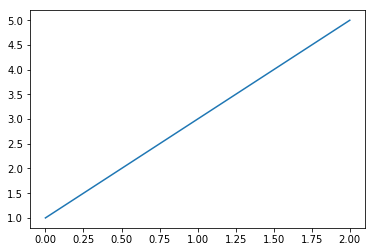

In [41]:
# двух точек достаточно для того, чтобы построить прямую

x = [0, 2] # ординаты
y = [1, 5] # абсциссы

plt.plot(x, y)

Заметим, что сама функция `plot` не рисует график, а просто инициализирует нужную информацию для этого. В среде Jupyter Notebook по умолчанию используется режим, при котором вывод графика на экран происходит автоматически при выполнении ячейки, но вообще говоря, за это отвечает отдельная функция `show`. Если вы при работе с Matplotlib столкнетесь с ситуацией, когда график не отображается, в первую очередь стоит попробовать вызвать эту функцию.

Давайте немного иначе настроим наш график, чтобы продемонстрировать некоторые возможности Matplotlib:

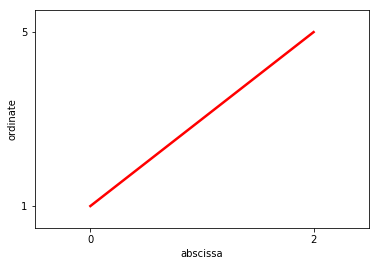

In [42]:
x = np.array([0, 2])
y = np.array([1, 5])

# задаем дополнительно цвет линии и толщину
plt.plot(x, y, color='red', linewidth=2.5)

# установим границы осей X и Y так, чтобы график не
# выглядел "зажатым" осями координат
plt.xlim(x.min() - 0.5, x.max() + 0.5)
plt.ylim(y.min() - 0.5, y.max() + 0.5)

# определим, какие точки будут отмечены на осях
x_ticks = np.linspace(x.min(), x.max(), 2)
y_ticks = np.linspace(y.min(), y.max(), 2)
plt.xticks(x_ticks)
plt.yticks(y_ticks)

# определим, как будут подписаны координатные оси
plt.xlabel('abscissa')
plt.ylabel('ordinate')

# рисуем график
plt.show()

Можно в одной системе координат отобразить сразу несколько графиков. Давайте попробуем вывести графики синуса и косинуса.

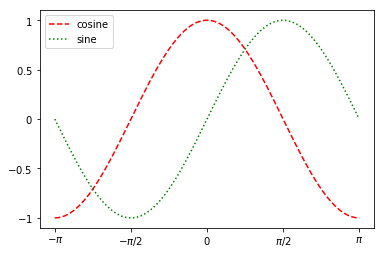

In [43]:
x = np.linspace(-np.pi, np.pi, 200)
cos_x = np.cos(x)
sin_x = np.sin(x)

# добавляем два графика, устанавливаем для них цвет, тип линии
# и название
plt.plot(x, cos_x, color='red', linestyle='dashed', label='cosine')
plt.plot(x, sin_x, color='green', linestyle='dotted', label='sine')

# добавляем легеду (информацию о том, какая линия что означает)
plt.legend()

# определяем, какие точки будут отмечены на осях
# можно в качестве значения указывать LaTeX-формулу (используем
# это для того, чтобы вместо, например, 3.1415.. было написано pi)
x_ticks = np.array([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
x_ticks_name = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = np.array([-1, -0.5, 0, 0.5, 1])
y_ticks_name = [r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$']

plt.xticks(x_ticks, x_ticks_name)
plt.yticks(y_ticks, y_ticks_name)

# рисуем график
plt.show()

Теперь давайте попробуем настроить координатные оси таким образом, чтобы центр графика находился в точке $(0, 0)$, как мы привыкли со школы. Для этого нам потребуется метод `gca`, возвращающий объект, который можно использовать для управления внешним видом координатных осей. На рисунке сверху есть четыре оси, образующих прямоугольник, внутри которого находятся графики. Нам нужно скрыть две из них (например, ту, что сверху и ту, что справа), а оставшиеся две поместить в точку $(0, 0)$:

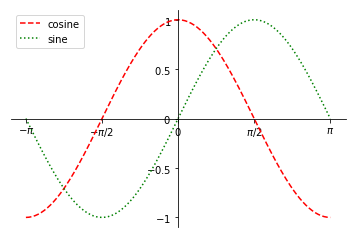

In [44]:
x = np.linspace(-np.pi, np.pi, 200)
cos_x = np.cos(x)
sin_x = np.sin(x)

# добавляем два графика, устанавливаем для них цвет, тип линии
# и название
plt.plot(x, cos_x, color='red', linestyle='dashed', label='cosine')
plt.plot(x, sin_x, color='green', linestyle='dotted', label='sine')

# добавляем легеду (информацию о том, какая линия что означает)
plt.legend()

# определяем, какие точки будут отмечены на осях
# можно в качестве значения указывать LaTex-формулу (используем
# это для того, чтобы вместо, например, 3.1415.. было написано pi)
x_ticks = np.array([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])
x_ticks_name = [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$\pi/2$', r'$\pi$']
y_ticks = np.array([-1, -0.5, 0, 0.5, 1])
y_ticks_name = [r'$-1$', r'$-0.5$', r'$0$', r'$0.5$', r'$1$']

plt.xticks(x_ticks, x_ticks_name)
plt.yticks(y_ticks, y_ticks_name)

# меняем положение координатных осей
axes = plt.gca()

    # скрываем две оси
axes.spines['top'].set_color(None)
axes.spines['right'].set_color(None)

    # устаналиваем позицию левой и правой оси;
    # data' означает, что 0 - это координата, через которую должна проходить ось
axes.spines['left'].set_position(('data', 0))
axes.spines['bottom'].set_position(('data', 0))

# рисуем график
plt.show()

### Диаграмма разброса

Диаграмма разброса используется тогда, когда нужно оценить корреляцию между несколькими факторами. Для примера, в качестве одного фактора мы возьмем просто случайные, ничего не означающие данные. Второй фактор мы получим как сумму первого и некоторой случайной величины с достаточно большой дисперсией. Очевидно, что между этими двумя значениями мы должны увидеть положительную корреляцию - с ростом одного, увеличивается и второе. Проверим это на практике:

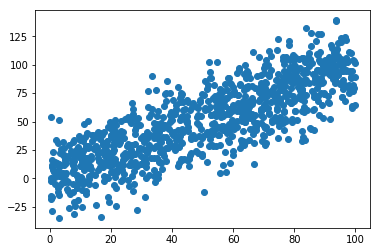

In [45]:
from random import uniform
from random import normalvariate

# используем генератор, чтобы создать массив случайных данных
x = np.array([uniform(0, 100) for i in range(1000)])
y = np.array([item + normalvariate(0, 20) for item in x])

# строим диаграмму разброса
plt.scatter(x, y)
plt.show()

Несмотря на то, что мы выбрали большое значение стандартного отклонения для случайной величины, с помощью которой мы оказывали влияние на первый фактор, положительная корреляция видна невооруженным глазом: с ростом $x$ возрастает $y$. Если стандартное отклонение продолжить увеличивать, то в определенный момент корреляция, очевидно, пропадет. Убедитесь в этом сами.

### Гистограмма

Гистограммы часто используются для того, чтобы сделать предположение о том, какому распределению подчиняется случайная выборка: по выборке строится гистограмма, а затем сравнивается, плотность распределения какого закона она напоминает больше всего. В качестве примера, рассмотрим выборку из нормального закона распределения, но вообразим, что нам это неизвестно:

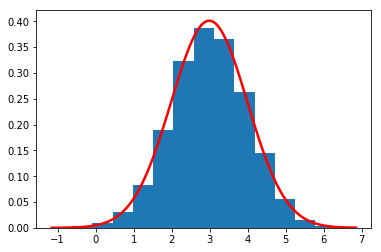

In [46]:
from math import sqrt
from random import normalvariate

def norm_density(x, mean, std):
    tmp1 = 1 / (std * np.sqrt(2 * np.pi))
    tmp2 = -((x - mean)**2 / 2 * std**2)
    return tmp1 * (np.e ** tmp2)


x = np.array([normalvariate(3, 1) for i in range(10000)])

# добавляем гистограмму на график (bins - количество столбиков в ней)
plt.hist(x, bins=15, density=True)

# добавим еще для наглядности график плотности распределения
x_mean = np.mean(x)
x_std = np.std(x) # стандартное отклонение
density_x = np.linspace(x.min(), x.max(), 200)
density_y = np.array([norm_density(item, x_mean, x_std) for item in density_x])
plt.plot(density_x, density_y, linewidth=2.5, color='red')

# рисуем графики
plt.show()

Как видите, гистограмма, построенная по выборке из "неизвестной" случайной величины, по форме похожа на плотность нормального распределения. Исходя из этого можно сделать вывод, что "неизвестная" случайная величина имеет закон распределения, близкий к нормальному.

В заключение дадим очень полезную [ссылку](https://matplotlib.org/tutorials/index.html) на раздел документации библиотеки Matplotlib, по которой можно найти большое количество примеров графиков вместе с исходным кодом, строящим их. Примеры оттуда позволяют увидеть весь спектр возможностей Matplotlib.

## pandas

Библиотека [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) предоставляет классы для быстрой обработки и анализа больших объемов данных. В своей реализации она использует библиотеку NumPy, с которой мы познакомились чуть выше. Двумя важнейшими классами библиотеки pandas являются `Series` и `DataFrame`. Оба они представляют собой массивы, элементам которых назначены специальные **метки** (англ. *label*), в совокупности образующие **индекс** этого массива. Термин "индекс" из pandas пересекается с тем, что мы использовали для обозначения позиции элемента в последовательности. Обычно путаницы из-за этого не возникает, но вам стоит иметь это в виду.

Все элеметы массивов pandas приводятся к одному и тому же типу данных (используются типы из библиотеки NumPy).

Перед тем как начать использование библиотеки pandas, подключим необходимый модуль:

In [47]:
import numpy as np
import pandas as pd

### Класс Series

`Series` представляет собой изменяемый одномерный массив, к каждому элементу которого прикреплена произвольная метка. Объект класса `Series` можно создать несколькими способами:

In [48]:
# из обычного списка
s = pd.Series([1, 2, 3, 4, 5])
print(s)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [49]:
# из ndarray
s = pd.Series(np.random.random((3)))
print(s)

0    0.825980
1    0.605343
2    0.690893
dtype: float64


Обратите внимание на первый столбец в выведенных на экран объектах `Series` - это и есть их индекс. Обратиться к нему можно с помощью атрибута `index`:

In [50]:
print(s.index)

RangeIndex(start=0, stop=3, step=1)


По умолчанию индекс представляет собой последовательно возрастающие от нуля числа, но это легко можно изменить, явно указав метки:

In [51]:
s = pd.Series([1, 2, 3], index=['first', 'second', 'third'])
print(s.index)
print(s)

Index(['first', 'second', 'third'], dtype='object')
first     1
second    2
third     3
dtype: int64


Одномерный массив можно создать с помощью словаря Python, при этом ключи становятся метками, а значения - элементами:

In [52]:
s = pd.Series({'a':100, 'b':200, 'c':300})
print(s)

a    100
b    200
c    300
dtype: int64


Объекты класса `Series` могут использовать как `ndarray` или как `dict`:

In [53]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

# получаем элемент по его позиции, как для ndarray
print(s[1])

# обращаемся к элементу по метке, как для dict
print(s['e'])

# определяем, есть ли метка в объекте Series
print('c' in s)

2
5
True


In [54]:
# получаем срез, как для ndarray;
# срез объекта Series тоже имеет тип Series
print(s[3:1:-1])

d    4
c    3
dtype: int64


Бинарные операции для одномерных массивов pandas работают так же, как и для массивов NumPy (применяются для каждого элемента). Универсальные функции NumPy могут в качестве аргумента принимать объекты `Series`:

In [55]:
s1 = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
s2 = pd.Series([0.1, 0.2, 0.3], index=['a', 'b', 'c'])
print(s1, '\n')
print(s2)

a    1
b    2
c    3
dtype: int64 

a    0.1
b    0.2
c    0.3
dtype: float64


In [56]:
print(s1 * 3, '\n')
print(s1 + s2, '\n')
print(np.exp(s1))

a    3
b    6
c    9
dtype: int64 

a    1.1
b    2.2
c    3.3
dtype: float64 

a     2.718282
b     7.389056
c    20.085537
dtype: float64


Особо стоит отметить случай, когда бинарная операция выполняется для массивов `Series`, имеющих разные метки. В этом случае происходит следующее: если метка есть в обоих массивах, то операция выполняется и ее результат становится значением элемента в новом объекте, иначе - в новый объект записывается специальная константа `Nan`, которая трактуется как отсутствие значения.

In [57]:
s2.index = ['x', 'a', 'c'] # меняем индекс у объекта s2
print(s2)

x    0.1
a    0.2
c    0.3
dtype: float64


In [58]:
result = s1 - s2
print(result)

a    0.8
b    NaN
c    2.7
x    NaN
dtype: float64


Любые бинарные арифметические операции со значениями `Nan` будут давать `Nan`:

In [59]:
print(result + 1)

a    1.8
b    NaN
c    3.7
x    NaN
dtype: float64


Объекты типа `Series` поддерживают обращение сразу к нескольким элементам:

In [60]:
s = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
print(s[['a', 'd', 'e']], '\n')

# изменяем сразу несколько элементов
s[['c', 'd']] = 0
print(s)

a    1
d    4
e    5
dtype: int64 

a    1
b    2
c    0
d    0
e    5
dtype: int64


Объекты типа `Series` можно сравнивать между собой и со скалярами. Сравнения, как и другие бинарные операции, выполняются для каждого элемента отдельно. Результатом становится новый объект, у которого в i-ой позиции стоит `True`, если сравнение соответствующего элемента дало истину:

In [61]:
s1 = pd.Series([10, 5, 7])
s2 = pd.Series([1, 12, 3])

print(s1 > s2, '\n')
print(s2 == 3)

0     True
1    False
2     True
dtype: bool 

0    False
1    False
2     True
dtype: bool


С помощью массива, состоящего из булевых элементов, можно отфильтровать элементы другого массива той же размерности. При этом в результирующий объект `Series` попадают только элементы, для которых в соответствующей позиции фильтрующего массива находится `True`:

In [62]:
print(s1[s1 > s2])

0    10
2     7
dtype: int64


В заключение скажем, что объекты класса `Series` являются итерируемыми, т.е. могут использоваться в цикле `for ... in`:

In [63]:
s = pd.Series({'aaa':0.1, 'bbb':0.2, 'ccc':0.3})

for item in s:
    print(item)

0.1
0.2
0.3


In [64]:
# так выполняется итерация по меткам:
for item in s.index:
    print(item)

aaa
bbb
ccc


### Класс DataFrame

Класс `DataFrame` представляет двумерный изменяемый массив (матрицу), столбцами которого являются одномерные массивы `Series`. С помощью атрибутов `index` и `columns` задаются метки для строк и столбцов. Как и для типа `Series`, объекты `DataFrame` можно создавать несколькими способами:

In [65]:
# из словаря Series (ключи словаря становятся метками столбцов,
# индексы Series объединяются и образуют индекс для строк)
df = pd.DataFrame({'col1': pd.Series([1, 2, 3], ['row1', 'row2', 'row3']),
                   'col2': pd.Series([0.1, 0.2, 0.3, 0.4], ['row1', 'row2', 'row5', 'row6'])})
print(df)
print(df.index)
print(df.columns)

      col1  col2
row1   1.0   0.1
row2   2.0   0.2
row3   3.0   NaN
row5   NaN   0.3
row6   NaN   0.4
Index(['row1', 'row2', 'row3', 'row5', 'row6'], dtype='object')
Index(['col1', 'col2'], dtype='object')


In [66]:
# из словаря ndarray/list (ключи словаря становятся метками
# столбцов, для строк используется индекс по умолчанию)
df = pd.DataFrame({'c1': [1, 2, 3], 'c2':[4, 5, 6]})
df.index = ['r1', 'r2', 'r3']
print(df)

    c1  c2
r1   1   4
r2   2   5
r3   3   6


Семантически объект `DataFrame` может рассматриваться как [словарь](09_Collections.ipynb#Словарь), ключом в котором являются метки столбцов, а значением - соответствующие объекты `Series`. Операции, которые мы рассматривали для словаря, схожим образом выполняются и для объектов `DataFrame`: 

In [67]:
df = pd.DataFrame({'c1': pd.Series(np.random.random(3), ['r1', 'r2', 'r3']),
                   'c2': pd.Series(np.random.random(4), ['r1', 'r2', 'r3', 'r4']),
                   'c3': pd.Series(np.random.random(3), ['r1', 'r3', 'r4'])})
print(df)

          c1        c2        c3
r1  0.308978  0.940771  0.988228
r2  0.778484  0.472404       NaN
r3  0.570186  0.831688  0.568123
r4       NaN  0.513793  0.575264


In [68]:
# получение конкретного элемента
print(df['c1']['r1'], '\n')

# получение нескольких элементов столбца
print(df['c3'][['r1', 'r2']], '\n')

# получение столбца целиком
print(df['c2'])

0.30897794183961025 

r1    0.988228
r2         NaN
Name: c3, dtype: float64 

r1    0.940771
r2    0.472404
r3    0.831688
r4    0.513793
Name: c2, dtype: float64


Очень удобной является возможность обращаться к столбцам и строкам как к атрибутам. Например, вот так мы можем переписать предыдущий блок кода:

In [69]:
print(df.c1.r1, '\n')
print(df.c3[['r1', 'r2']], '\n')
print(df.c2)

0.30897794183961025 

r1    0.988228
r2         NaN
Name: c3, dtype: float64 

r1    0.940771
r2    0.472404
r3    0.831688
r4    0.513793
Name: c2, dtype: float64


In [70]:
# добавление и удаление столбца
df['c4'] = pd.Series(np.random.random(2), index=['r2', 'r4'])
print(df, '\n')

del df['c4']
print(df)

          c1        c2        c3        c4
r1  0.308978  0.940771  0.988228       NaN
r2  0.778484  0.472404       NaN  0.461306
r3  0.570186  0.831688  0.568123       NaN
r4       NaN  0.513793  0.575264  0.369241 

          c1        c2        c3
r1  0.308978  0.940771  0.988228
r2  0.778484  0.472404       NaN
r3  0.570186  0.831688  0.568123
r4       NaN  0.513793  0.575264


Существуют также удобные способы для обращения к строкам. В результате возвращаются объекты `Series`, индекс которых состоит из меток столобцов объекта `DataFrame`.

In [71]:
# получаем строку по метке и по позиции
print(df.loc['r2'], '\n')
print(df.iloc[1])

c1    0.778484
c2    0.472404
c3         NaN
Name: r2, dtype: float64 

c1    0.778484
c2    0.472404
c3         NaN
Name: r2, dtype: float64


In [72]:
# получаем сразу несколько строк
print(df.loc[['r1', 'r3']], '\n')

# получаем несколько строк и несколько столбцов
print(df.loc[['r2', 'r3'], ['c1', 'c2']])

          c1        c2        c3
r1  0.308978  0.940771  0.988228
r3  0.570186  0.831688  0.568123 

          c1        c2
r2  0.778484  0.472404
r3  0.570186  0.831688


Наконец, можно получить целый набор строк объекта `DataFrame` одним из следующих способов (в результате получается новый объект `DataFrame`, как и следовало ожидать):

In [73]:
# используем операцию взятия среза
df2 = df[3:1:-1]
print(type(df2))
print(df2)

<class 'pandas.core.frame.DataFrame'>
          c1        c2        c3
r4       NaN  0.513793  0.575264
r3  0.570186  0.831688  0.568123


In [74]:
# используем специфическую для массивов pandas операцию
print(df.loc[['r1', 'r2']])

          c1        c2        c3
r1  0.308978  0.940771  0.988228
r2  0.778484  0.472404       NaN


С таблицами, можно выполнять арифметические операции, которые реализованы по тому же принципу, что и для объектов `Series`:

In [75]:
df1 = pd.DataFrame({'c1': pd.Series([0, 1, 2], ['r1', 'r2', 'r3']),
                    'c2': pd.Series([3, 4, 5], ['r1', 'r2', 'r3'])})
df2 = pd.DataFrame({'c1': pd.Series([0.0, 0.1, 0.2], ['r1', 'r2', 'r3']),
                    'c2': pd.Series([0.3, 0.4, 0.5], ['r1', 'r2', 'r4']),
                    'c3': pd.Series([0.6, 0.7, 0.8], ['r1', 'r2', 'r4'])})
s = pd.Series(np.ones((3)), index=['c1', 'c2', 'c3'])

print(df1, '\n')
print(df2, '\n')
print(s)

    c1  c2
r1   0   3
r2   1   4
r3   2   5 

     c1   c2   c3
r1  0.0  0.3  0.6
r2  0.1  0.4  0.7
r3  0.2  NaN  NaN
r4  NaN  0.5  0.8 

c1    1.0
c2    1.0
c3    1.0
dtype: float64


In [76]:
# арифметическая операция со скаляром
print(df1 + 1)

    c1  c2
r1   1   4
r2   2   5
r3   3   6


In [77]:
# арифметическая операция с двумя матрицами (результат состоит
# из объединения строк и столбцов операндов, значение Nan вставляется
# в позиции, где отсутствует элемент в одном из операндов)
print(df1 * df2)

     c1   c2  c3
r1  0.0  0.9 NaN
r2  0.1  1.6 NaN
r3  0.4  NaN NaN
r4  NaN  NaN NaN


In [78]:
# арифметическая операция с объектом Series (выполняется по строкам,
# т.е. в индексе объекта Series должны быть указаны метки столбцов,
# для которых нужно применить операцию)
print(df2 - s)

     c1   c2   c3
r1 -1.0 -0.7 -0.4
r2 -0.9 -0.6 -0.3
r3 -0.8  NaN  NaN
r4  NaN -0.5 -0.2


Покажем, как можно создать новый объект `DataFrame`, применив фильтрацию к элементам существующего:

In [79]:
result = df2[df2.c2 > 0.3]
print(result)

     c1   c2   c3
r2  0.1  0.4  0.7
r4  NaN  0.5  0.8


В заключение скажем, что объекты `DataFrame` являются итерируемыми, и их можно использовать в циклах `for ... in`. При этом стоит отметить, что итерация по массивам pandas выполняется **медленно**, и лучше ее избегать (например, подобрав нужную функцию, которая сделает все сама).

### Статистика

В pandas существует большое количество функций и методов, предназначенных для получения различных статистических данных об одномерных и двумерных массивах. В этом разделе мы рассмотрим некоторые из них.

In [80]:
s = pd.Series(np.random.random(5))
df = pd.DataFrame({'c1': pd.Series(np.random.random(3), index=['r1', 'r2', 'r3']),
                   'c2': pd.Series(np.random.random(3), index=['r1', 'r2', 'r3'])})

print(s, '\n')
print(df)

0    0.802763
1    0.881109
2    0.604589
3    0.606030
4    0.453705
dtype: float64 

          c1        c2
r1  0.679956  0.461280
r2  0.697153  0.006743
r3  0.152008  0.663765


In [81]:
# статистика для Series
print('sum={}, prod={}'.format(\
       s.sum(), s.prod()))
print('mean={}, var={}, std={}'.format(\
       s.mean(), s.var(), s.std()))

sum=3.3481964332404925, prod=0.11758321064167483
mean=0.6696392866480985, var=0.02933662862069077, std=0.1712793876118512


In [82]:
# статистика для DataFrame (методы все те же)
    
    # сумма элементов по столбцам
print(df.sum(), '\n')

    # сумма элементов по строкам
print(df.sum(1))

c1    1.529117
c2    1.131789
dtype: float64 

r1    1.141236
r2    0.703896
r3    0.815773
dtype: float64


In [83]:
# основная статистика для DataFrame (для Series тот же метод)
print(df.describe())

             c1        c2
count  3.000000  3.000000
mean   0.509706  0.377263
std    0.309894  0.336472
min    0.152008  0.006743
25%    0.415982  0.234012
50%    0.679956  0.461280
75%    0.688554  0.562523
max    0.697153  0.663765


На этом мы заканчиваем рассмотрение библиотеки pandas. Конечно, это лишь малая часть ее возможностей, однако, имея представление о работе с главными типами данных `Series` и `DataFrame`, можно легко продолжать самостоятельное изучение.


- - -
[Предыдущая: Стандартная библиотека](10_Standard_Library.ipynb) |
[Содержание](00_Overview.ipynb#Содержание)